In [16]:
using LinearAlgebra
x = [1,2,3]
y = [3,2,1]
dot(x,y)
sum(x .* y)

norm(x)
#sqrt(sum(x .^ 2))

3.7416573867739413

In [13]:
A = [1.0 2.0; 3.0 4.0]
b = ones(2,1)
det(A)
inv(A)
x = inv(A) * b
A\b

2×1 Matrix{Float64}:
 -1.0
  1.0

## Study Case: worker's employment dynamics.
## Simplifying the situation and thinking the probabilities approximate the better as possible the dynamic of any worker. 
P = [1-a a ; b 1-b]. a,b in (0,1). \
Knowing stationary probability is b/a+b (theorical)\
Xn° = 1/n sum t = 1 .. n of 1{Xt = s} (empirical)

In [14]:
using Random
function simulate_mc(P, x0, T=10000)
    X = zeros(Int, T)
    X[1] = x0

    for t = 1:(T-1)
        u = rand()
        if X[t] == 1
            X[t+1] = (u <= P[1,1]) ? 1 : 2
            
        else
            X[t+1] = (u <= P[2,2]) ? 2 : 1
        end
    end
    return X
end
function time_avarage(X, s)
    T = length(X)
    Xbar = zeros(Float64, T)
    c = 0
    for n = 1:T
        c += (X[n] == s) ? 1 : 0
        Xbar[n] = c / n
    end
    return Xbar
end   

time_avarage (generic function with 1 method)

In [23]:
a = 0.1
b = 0.1
P = [1-a a; b 1-b]

x0 = 1
x0_prime = 2
T = 10000



s = 1 # State of which take time avarage 
Xbar1 = time_avarage( simulate_mc(P, x0), s)
Xbar2 = time_avarage( simulate_mc(P, x0_prime), s)


10000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.08333333333333333
 0.15384615384615385
 ⋮
 0.5186705375913505
 0.5186186186186186
 0.5185667100390351
 0.5185148118494796
 0.5184629240468328
 0.5184110466279768
 0.5183591795897949
 0.5183073229291717
 0.5182554766429929
 0.5182036407281456
 0.5181518151815182
 0.5181

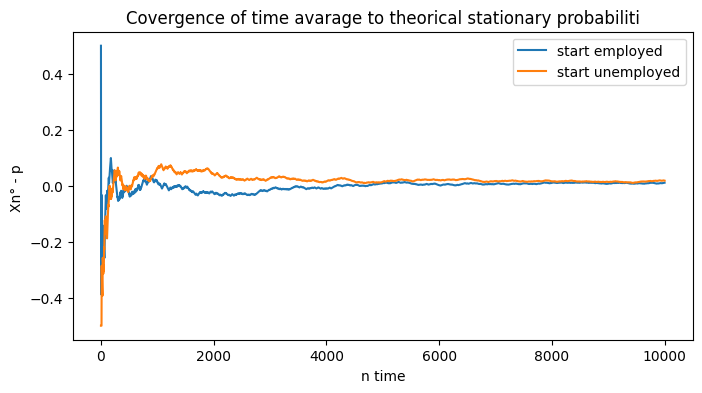

PyObject Text(0.5, 1.0, 'Covergence of time avarage to theorical stationary probabiliti')

In [27]:
using PyPlot
p1 = b / (a+b) # stationary probability for state 1
fig = figure(figsize=(8,4))
plot(1:T, Xbar1 .- p1, label="start employed")
plot(1:T, Xbar2 .- p1, label="start unemployed")
xlabel("n time")
ylabel("Xn° - p ")
legend()
title("Covergence of time avarage to theorical stationary probabiliti")

In [3]:
# Initialize a 14x14 matrix of zeros
adj_matrix = zeros(Int, 14, 14)

# Define the connections based on your graph
# format: adj_matrix[from, to] = 1

# Node 1 (a)
adj_matrix[1, 4] = 1; adj_matrix[1, 6] = 1

# Node 2 (b)
adj_matrix[2, 10] = 1; adj_matrix[2, 13] = 1

# Node 3 (c)
adj_matrix[3, 3] = 1; adj_matrix[3, 7] = 1; adj_matrix[3, 10] = 1; adj_matrix[3, 12] = 1

# Node 4 (d)
adj_matrix[4, 6] = 1; adj_matrix[4, 10] = 1; adj_matrix[4, 11] = 1

# Node 5 (e)
adj_matrix[5, 4] = 1; adj_matrix[5, 8] = 1; adj_matrix[5, 12] = 1

# Node 6 (f)
adj_matrix[6, 1] = 1; adj_matrix[6, 10] = 1; adj_matrix[6, 11] = 1; adj_matrix[6, 12] = 1

# Node 7 (g)
adj_matrix[7, 2] = 1; adj_matrix[7, 10] = 1

# Node 8 (h)
adj_matrix[8, 4] = 1; adj_matrix[8, 7] = 1; adj_matrix[8, 13] = 1

# Node 9 (i)
adj_matrix[9, 7] = 1; adj_matrix[9, 14] = 1

# Node 10 (j)
adj_matrix[10, 5] = 1; adj_matrix[10, 9] = 1; adj_matrix[10, 11] = 1; adj_matrix[10, 14] = 1

# Node 11 (k)
adj_matrix[11, 14] = 1

# Node 12 (l)
adj_matrix[12, 13] = 1

# Node 13 (m)
adj_matrix[13, 7] = 1; adj_matrix[13, 2] = 1

# Node 14 (n)
adj_matrix[14, 3] = 1; adj_matrix[14, 10] = 1

# Display the matrix
display(adj_matrix)

14×14 Matrix{Int64}:
 0  0  0  1  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  1  0
 0  0  1  0  0  0  1  0  0  1  0  1  0  0
 0  0  0  0  0  1  0  0  0  1  1  0  0  0
 0  0  0  1  0  0  0  1  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  1  1  1  0  0
 0  1  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  1  0  0  1  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  1  0  1  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  1  0
 0  1  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0  0

In [4]:
using Pkg
Pkg.add("GraphRecipes")

   Resolving package versions...
   Installed EarCut_jll ─────── v2.2.4+0
   Installed NetworkLayout ──── v0.4.10
   Installed Ratios ─────────── v0.4.5
   Installed XZ_jll ─────────── v5.8.2+0
   Installed OffsetArrays ───── v1.17.0
   Installed SentinelArrays ─── v1.4.9
   Installed ADTypes ────────── v1.21.0
   Installed StaticArrays ───── v1.9.16
   Installed Extents ────────── v0.1.6
   Installed ColorVectorSpace ─ v0.10.0
   Installed AbstractTrees ──── v0.4.5
   Installed GeometryTypes ──── v0.8.5
   Installed ChainRulesCore ─── v1.26.0
   Installed ColorTypes ─────── v0.11.5
   Installed GraphRecipes ───── v0.5.15
   Installed Interpolations ─── v0.16.2
   Installed FFMPEG_jll ─────── v8.0.1+0
   Installed AxisAlgorithms ─── v1.1.0
   Installed GeometryBasics ─── v0.5.10
   Installed WoodburyMatrices ─ v1.0.0
  Installing 3 artifacts
   Installed artifact EarCut                   80.5 KiB
   Installed artifact XZ                       1.5 MiB
   Installed artifact FFMPEG       

In [5]:
Pkg.status()

Status `~/.julia/environments/v1.12/Project.toml`
  [49dc2e85] Calculus v0.5.2
  [8f4d0f93] Conda v1.10.3
  [a93c6f00] DataFrames v1.8.1
  [31c24e10] Distributions v0.25.122
  [28b8d3ca] GR v0.73.19
  [bd48cda9] GraphRecipes v0.5.15
  [86223c79] Graphs v1.13.3
  [7073ff75] IJulia v1.33.0
  [429524aa] Optim v1.13.3
  [91a5bcdd] Plots v1.41.3
  [d330b81b] PyPlot v2.11.6
  [fcd29c91] QuantEcon v0.17.0
  [f2b01f46] Roots v2.2.10


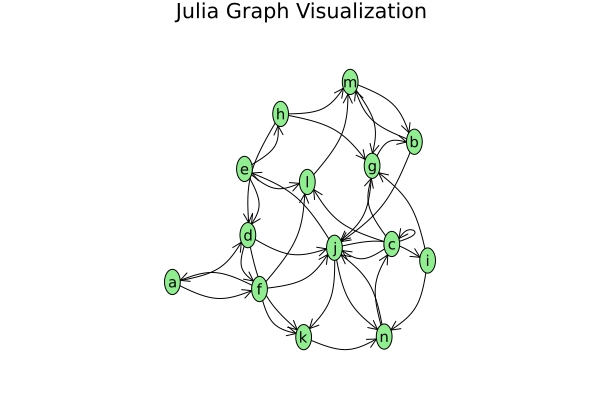

In [6]:
using Graphs
using Plots
using GraphRecipes
# 1. Create a directed graph with 14 vertices
g = SimpleDiGraph(14)

# 2. Add edges (using the numeric mapping we established)
# Format: add_edge!(graph, from, to)
edges = [
    (1,4), (1,6), (2,10), (2,13), (3,3), (3,7), (3,10), (3,12),
    (4,6), (4,10), (4,11), (5,4), (5,8), (5,12), (6,1), (6,10),
    (6,11), (6,12), (7,2), (7,10), (8,4), (8,7), (8,13), (9,7),
    (9,14), (10,5), (10,9), (10,11), (10,14), (11,14), (12,13),
    (13,7), (13,2), (14,3), (14,10)
]

for (u, v) in edges
    add_edge!(g, u, v)
end

# 3. Plot the graph
# we use the letter labels to make it look like your image
node_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n"]

graphplot(g, 
    names=node_labels, 
    nodeshape=:ellipse, 
    nodecolor=:lightgreen,
    curves=true, 
    nodesize=0.15,
    fontsize=10,
    title="Julia Graph Visualization")

In [2]:
function build_stochastic_matrix(A)
    n = size(A,1)
    P = zeros(Float64, n, n)

    for i = 1:n
        out_links = sum(A[i, :])
        if out_links > 0
            for j = 1:n
                P[i,j] = A[i,j] / out_links 
            end
        else 
            P[i,j] .= 1/n
        end
    end
    return P
end

function simulate_surfer(P, x0=1, T=10000)
    n = size(P,1)
    X = zeros(Int64, T)
    X[1] = x0

    for t = 1:(T-1)
        u = rand()
        cumulative = cumsum(P[X[t], :])
        X[t+1] = findfirst(cumulative .> u)
    end
    return X
end 

function empirical_page_ranking(X, n)
    counts = zeros(Int, n)
    ranking = zeros(Float64, length(X), n)

    for t = 1:length(X)
        counts[X[t]] += 1
        ranking[t,:] = counts / t
    end
    return ranking
end

empirical_page_ranking (generic function with 1 method)

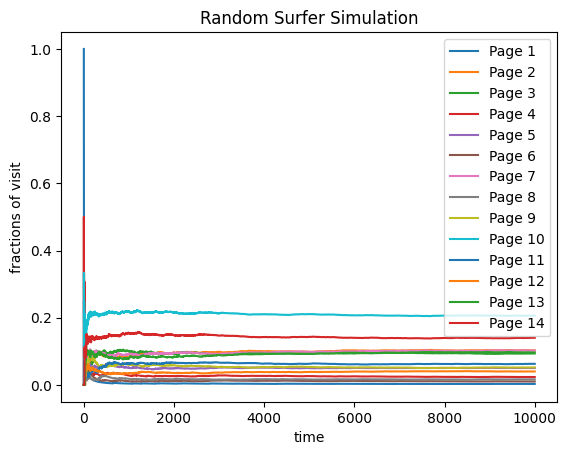

PyObject <matplotlib.legend.Legend object at 0x7f8a47f04e10>

In [6]:
using PyPlot

P = build_stochastic_matrix(adj_matrix)
ranking = empirical_page_ranking( simulate_surfer(P), size(P,1) )

fig = figure()
for i = 1:size(P,1)
    plot(1:size(ranking,1), ranking[:,i], label="Page $i")
end
title("Random Surfer Simulation")
xlabel("time")
ylabel("fractions of visit")
legend()

In [2]:
using Distributions
function AR_with_MC(rho, sigma_u, m=3, n=7)
    sigma_y = sqrt( (sigma_u^2) / (1-rho^2) )
    X = range(-m*sigma_y, m*sigma_y, n)
    s = (X[end] - X[1]) / (n-1)
    d = Normal(0, sigma_u)

    P = zeros(Float64, n, n)
    for i = 1:n 
        for j = 1:n
            if j == 1
                P[i,j] = cdf(d, X[1] - rho * X[i] + s/2 )
            elseif j == n
                P[i,j] = 1 - cdf(d, X[n] - rho * X[i] - s/2 )
            else
                P[i,j] = cdf(d, X[j] - rho * X[i] + s/2 ) - cdf(d, X[j] - rho * X[i] - s/2 )
            end
        end
    end
    return X, P
end

AR_with_MC (generic function with 3 methods)

Status `~/.julia/environments/v1.12/Project.toml`
  [49dc2e85] Calculus v0.5.2
  [8f4d0f93] Conda v1.10.3
  [a93c6f00] DataFrames v1.8.1
  [31c24e10] Distributions v0.25.122
  [28b8d3ca] GR v0.73.19
  [bd48cda9] GraphRecipes v0.5.15
  [86223c79] Graphs v1.13.3
  [7073ff75] IJulia v1.33.0
  [429524aa] Optim v1.13.3
  [91a5bcdd] Plots v1.41.3
  [d330b81b] PyPlot v2.11.6
  [fcd29c91] QuantEcon v0.17.0
  [f2b01f46] Roots v2.2.10


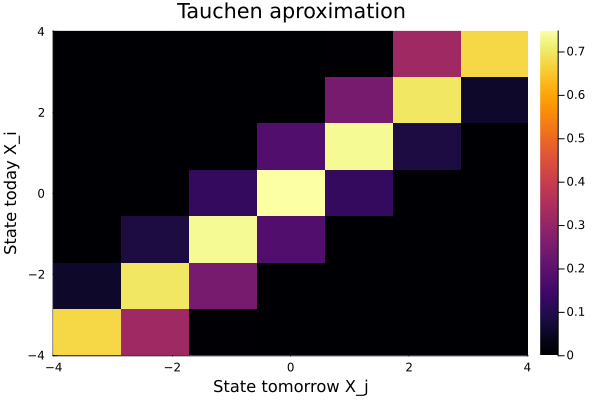

In [3]:
using Plots
using Pkg
Pkg.status()
X, P = AR_with_MC(0.9, 0.5)
heatmap(X,X,P,
        title="Tauchen aproximation",
        xlabel="State tomorrow X_j",
        ylabel="State today X_i")


In [ ]:
function compute_J(C, m=100)
    function j(v,dest)
        if v != dest
            return M
        else 
            return 0
        end
    end
    j
        